# CSE527 Homework 3
**Due date: 23:59 on Nov 10, 2024**

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Description
---
This homework contains three parts.  
```
Part 1 - Spinning up Faster R-CNN (10 points) and YOLOv11 (10 points)    
          You will be using pretrained models from different libraries(ultralytics and torchvision) to run detection of set of images
Part 2 - Finetuning DETR to detect object centroids (60 points)
          You will complete the 5 missing code blocks in the Detection transformer's training pipeline
Part 3 - Implementing UNet based segmentation model (20 points)
          You will code the slightly modified versions of UNet segmentation models  
```

Note: GPU is necessary to complete parts 2 and 3. So keeping in mind that colab has limited GPU time for users, try to use conserve GPU by disabling it in part 1.







## HW3 Part 1
---
While deep learning-based models are getting more and more complicated, it is relatively easy to run them. In this assignment part, we will try to use Faster R-CNN on a small subset of MS COCO images and YOLOv11 on a Cryo-EM dataset.

**Organizing the homework project files in your working space**
```
{last name}_{first name}_{sbu id}_hw3/
├── part1/
│   └── CSE527_24F_HW3_P1.ipynb
├── part2/
│   ├── CSE527_24F_HW3_P2.ipynb
│   └── detr/
├── part3/
│   ├── CSE527_24F_HW3_P3.ipynb
│   └── unet/
└── coco/
```

Create a directory named  `{last name}_{first name}_{sbu id}_hw3` and this will server as your `HW3_ROOT_PATH`.
Further you will have the 3 parts organized inside it as shown above. The coco dataset we will be using will also be in the root directory.

### MS COCO subset dataset

Through out the section 1 of homework 3 we will be using a small subset of MS COCO dataset (https://cocodataset.org/#home). Given the limited resources (gpu), you will only work on one class of objects: i.e, horses (why horses? you will see in part 2).Overall there are 500 images for training and 50 images for validation.

To load the dataset, place the [coco.zip dataset](https://drive.google.com/file/d/1GVyxYHwVgiG9z_Sn46wslT_2n65DLZRw/view?usp=sharing) at `HW3_ROOT_PATH`.

To pull this zip into your google drive, you have to first add the zip file as shortcut to root hw directory. To do this, open the above link and click on "Add shortcut to Drive" button (drive symbol with a plus) and navigate to correct path and add shortcut.

### Setting path variable

In [2]:
HW3_ROOT_PATH = 'hw3/'
PATH_TO_PART1 = HW3_ROOT_PATH + 'part1/'
PATH_TO_COCO = HW3_ROOT_PATH + 'coco/'
# TRY to use these variable wherever you load/save some file

### Unzip the dataset to ROOT/coco/

In [4]:
!unzip -n coco.zip

Archive:  coco.zip


## Part 1
---

In this part, you should use the above mentioned libraries as much as you can ([ultralytics](https://github.com/ultralytics) and [torchvision](https://github.com/pytorch/vision)).

Part1 has two seperate task, one is using the models [Faster RCNN](https://pytorch.org/vision/main/models/faster_rcnn.html) from [torchvision](https://github.com/pytorch/vision) to detect the objects in the 50 validation images at `PATH_TO_COCO/val2017/`, another is finetuning [YOLOv11](https://github.com/ultralytics/ultralytics) on given dataset to detect the obejct within images.

You should try using the ***medium*** sized newtorks for both tasks.

## Faster R-CNN task (10 points)
There are 50 images in the directory `PATH_TO_COCO/val2017/`. You should use [Faster RCNN Resnet50 FPN V2](https://pytorch.org/vision/main/models/faster_rcnn.html) to detect as many objects as possible and display those bounding boxes overlaying on the input image as shown below:

![Detected Img](https://drive.google.com/uc?export=view&id=1EtT36V44OSbA59Zsyi-WiTURaS9kTyVz)

The 50 predicted images should all be saved to a folder and displayed using the method `show_images(folder_path)`


In [5]:
!mkdir -p '{PATH_TO_PART1}'
%cd $PATH_TO_PART1

/gdrive/.shortcut-targets-by-id/1bE0lnMcU5RVsE1jbQeewCCLiA3JIkFL2/CSE527 Assignments/Murugan_Vijayabharathi_116745378_hw3/part1


In [7]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import cv2

def show_images(folder_path):
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    image_paths = image_paths[:50]
    rows = 5
    cols = 10
    fig, axes = plt.subplots(rows, cols, figsize=(18, 8))
    for i, image_path in enumerate(image_paths):
        image = cv2.imread(image_path)
        row = int(i / cols)
        col = i % cols
        axes[row, col].imshow(image)
        axes[row, col].set_title(os.path.basename(image_path))
        axes[row, col].axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
## USE THIS SPACE TO DETECT AND SHOW THE IMAGES
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_V2_Weights

# Load model and weights
# Setting threshold to 0.8 and turning model to eval mode
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.8)
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:01<00:00, 94.6MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [9]:
from torchvision.transforms import functional as F
from torchvision.utils import draw_bounding_boxes
from torchvision.datasets import ImageFolder

from torch.utils.data import Dataset, DataLoader, IterableDataset

class ImageBatch(Dataset):
    """
    Dataset class to iterate over COCO dataset
    """
    def __init__(self, folder_path, transform=None):
        super().__init__()
        self.paths = [os.path.join(folder_path, path) for path in os.listdir(folder_path)]
        self.transform = transform

    def __getitem__(self, idx):
        path = self.paths[idx]
        image = Image.open(path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

    def __len__(self):
        return len(self.paths)

    def __iter__(self):
        for i in range(len(self)):
            path = self.paths[i]
            image = Image.open(path).convert("RGB")
            if self.transform:
                image = self.transform(image)
            yield image

coco_dataset = ImageBatch(f"{PATH_TO_COCO}val2017", weights.transforms())

In [10]:
outputs = []
with torch.no_grad():
    for image in tqdm(coco_dataset):
        out = model([image])
        outputs += out

100%|██████████| 50/50 [07:28<00:00,  8.97s/it]


In [11]:
os.makedirs(f"{PATH_TO_PART1}results", exist_ok=True)
os.makedirs(f"{PATH_TO_PART1}results/task1", exist_ok=True)
for idx, image in tqdm(enumerate(coco_dataset), total=len(coco_dataset)):
    # Filtering horse boxes and labels
    boxes = outputs[idx]["boxes"][outputs[idx]["labels"] == 19]
    labels = [
        f"{weights.meta['categories'][label]} {score:.2f}"
        for label, score in zip(outputs[idx]['labels'], outputs[idx]['scores'])
        if label == 19
    ]
    if labels:
        image = draw_bounding_boxes(image, boxes, labels, width=2, font="calibri.ttf", font_size=17)
    image_np = image.permute(1, 2, 0).numpy()
    image_np = (image_np * 255).astype('uint8')
    image_pil = Image.fromarray(image_np)
    image_pil.save(f"{PATH_TO_PART1}results/task1/{coco_dataset.paths[idx].split('/')[-1]}.jpg")

100%|██████████| 50/50 [00:20<00:00,  2.46it/s]


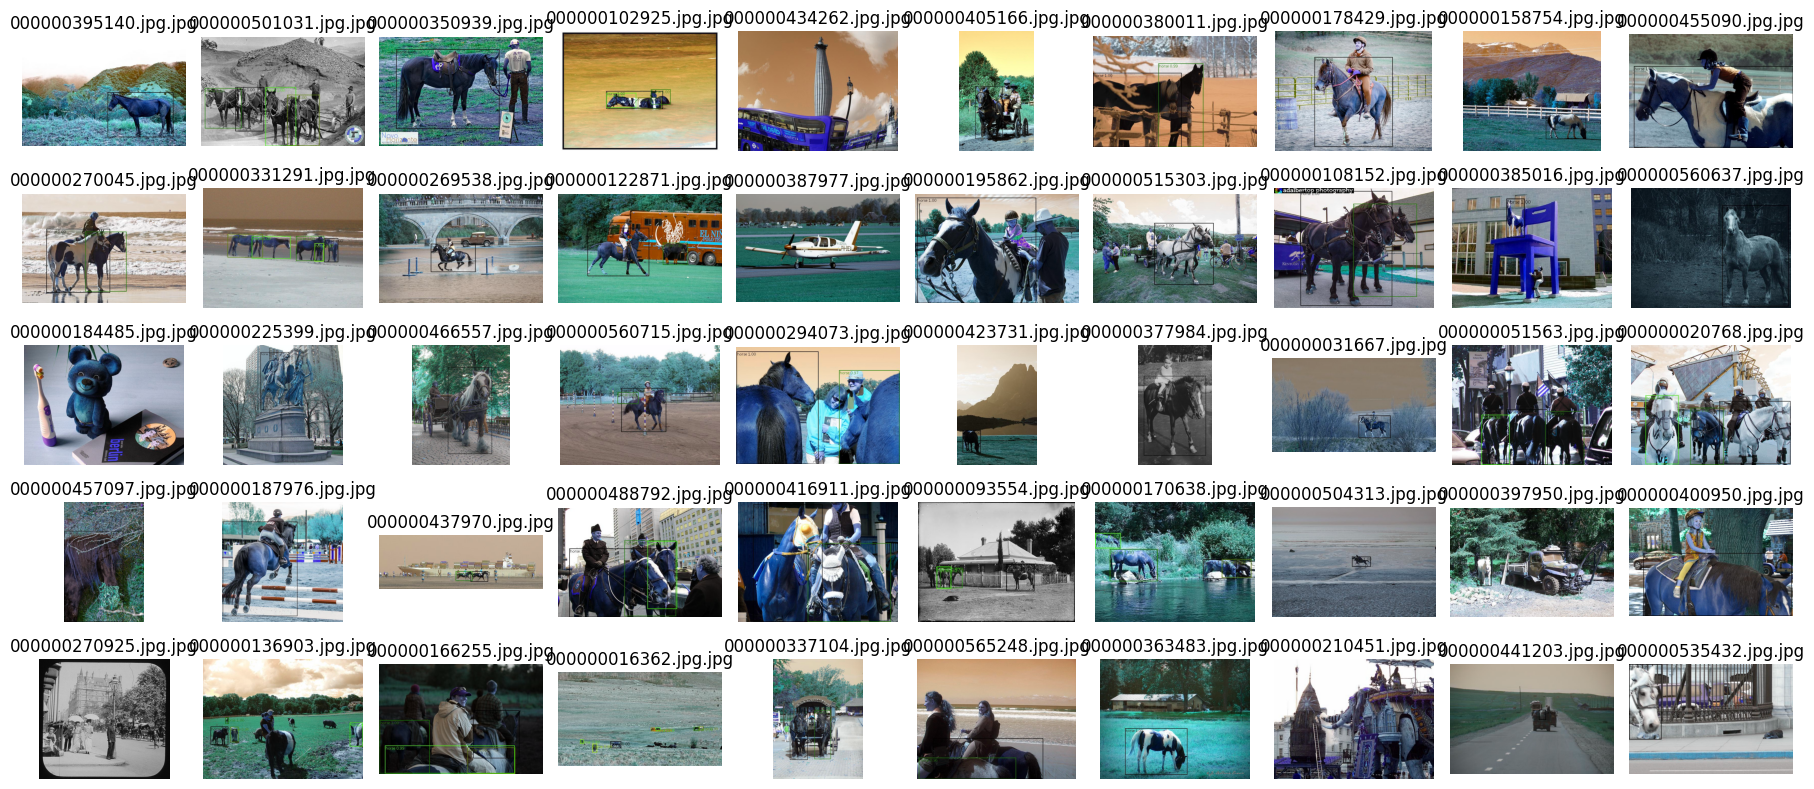

In [12]:
show_images(f"{PATH_TO_PART1}results/task1")

## YOLOv11 tasks [10 points]

In this section, you will focus on finetuning the [YOLOv11](https://github.com/ultralytics/ultralytics) (You Only Look Once) model for object detection on Cryo-Electron Microscopy (Cryo-EM) data, widely used in structural biology for capturing high-resolution images of molecular complexes. The task involves detecting particles within noisy and low-contrast Cryo-EM images, presenting a challenge typical of this data type. Students will implement the YOLOv11 model, train it using Cryo-EM datasets, and evaluate its performance using metrics like precision and recall. This hands-on exercise will help students understand how to fine-tune object detection models for specialized applications in scientific imaging.

### Dataset

The images for this section are present under `CryoEM/images` and the corresponding annotation file for each image is present in `CryoEM/particle_coordinates`. For this assignment we will only use the first three columns of the annotation file.


#### YOLO Data Format

In order to train YOLO model for our data, we will first have to restructure our data to match with YOLO's requirements, which can be found [here](https://docs.ultralytics.com/datasets/detect/). In brief each image needs a corresponding text file containing normalized bounding box coordinates and size, in corresponding directories based on wheather it is training/validation/testing splits.

In [14]:
import glob
import os
import pandas as pd
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO, settings

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [15]:
ANNOTATION_DIR = "CryoEM/particle_coordinates/"

def convert_to_YOLO_format(file_name, IMAGE_DIR, YOLO_anno_dir):
    image_path = IMAGE_DIR + file_name + ".jpg"
    anno_path = ANNOTATION_DIR + file_name + ".csv"
    orig_image = Image.open(image_path)
    img_w, img_h = orig_image.size
    df = pd.read_csv(anno_path)
    df_values = df.iloc[:, :3].values
    with open(YOLO_anno_dir + file_name + ".txt", "w") as f:
        for x,y,d in df_values:
            class_int = 0 # Set class label
            x_norm = x / img_w
            y_norm = y / img_h
            w_norm = d / img_w
            h_norm = d / img_h
            f.write("{} {} {} {} {}\n".format(class_int,x_norm,y_norm,w_norm,h_norm))


In [16]:
TRAIN_IMAGE_DIR = "CryoEM/images/train/"
TRAIN_YOLO_anno_dir = "CryoEM/labels/train/" # Directory to store converted labels

VAL_IMAGE_DIR = "CryoEM/images/val/"
VAL_YOLO_anno_dir = "CryoEM/labels/val/" # Directory to store converted labels

TEST_IMAGE_DIR = "CryoEM/images/test/"
TEST_YOLO_anno_dir = "CryoEM/labels/test/" # Directory to store converted labels

for directory in [TRAIN_YOLO_anno_dir, VAL_YOLO_anno_dir, TEST_YOLO_anno_dir]:
    os.makedirs(directory, exist_ok=True)

file_names = os.listdir(TRAIN_IMAGE_DIR)
for file_path in file_names:
    file_name = file_path[:-4]
    convert_to_YOLO_format(file_name,TRAIN_IMAGE_DIR,TRAIN_YOLO_anno_dir)

file_names = os.listdir(VAL_IMAGE_DIR)
for file_path in file_names:
    file_name = file_path[:-4]
    convert_to_YOLO_format(file_name,VAL_IMAGE_DIR,VAL_YOLO_anno_dir)

file_names = os.listdir(TEST_IMAGE_DIR)
for file_path in file_names:
    file_name = file_path[:-4]
    convert_to_YOLO_format(file_name,TEST_IMAGE_DIR,TEST_YOLO_anno_dir)

You will have to generate .yaml file as given in the YOLO [docs](https://docs.ultralytics.com/datasets/detect/).

In [17]:
data = """path: ../CryoEM
train: images/train
val: images/val
test: images/test

names:
    0: target"""

with open("CryoEM/data.yaml", "w") as f:
    f.write(data)


In [18]:
## USE THIS SPACE TO FIINETUNE THE YOLOv11 MODEL
model = YOLO("yolo11m.pt")

# Config for YOLO fine-tuning
# Freezing the backbone of the model only
# Head is finetuned completely since early layers of head detect smaller features
train_config = {
    "data" : f"{PATH_TO_PART1}CryoEM/data.yaml",
    "epochs": 100,
    "batch": 8,
    "freeze": 11,
    # "patience": 10,
    "device": "0",
}

results = model.train(**train_config)
model.save('results/fine_tuned_yolo11m_cryo_em.pt')

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/gdrive/MyDrive/CSE527 Assignments/Murugan_Vijayabharathi_116745378_hw3/part1/CryoEM/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=11, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

100%|██████████| 755k/755k [00:00<00:00, 24.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

train: Scanning /gdrive/.shortcut-targets-by-id/1bE0lnMcU5RVsE1jbQeewCCLiA3JIkFL2/CSE527 Assignments/Murugan_Vijayabharathi_116745378_hw3/part1/CryoEM/labels/train.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /gdrive/.shortcut-targets-by-id/1bE0lnMcU5RVsE1jbQeewCCLiA3JIkFL2/CSE527 Assignments/Murugan_Vijayabharathi_116745378_hw3/part1/CryoEM/labels/val.cache... 17 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.39G      4.869      3.814      2.086       1608        640: 100%|██████████| 7/7 [00:12<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.00s/it]

                   all         17      10134      0.323      0.163      0.215     0.0589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.34G      3.233      1.981      1.386       1388        640: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         17      10134      0.623      0.313      0.432      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.62G      2.683      1.332      1.235        811        640: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         17      10134      0.381      0.192      0.242     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.22G      2.513        1.1       1.16       1241        640: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         17      10134      0.196     0.0988      0.108     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.32G      2.384      1.059      1.115       1647        640: 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         17      10134     0.0467     0.0235     0.0239    0.00744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.4G      2.281      1.051      1.075       1605        640: 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         17      10134      0.061     0.0307     0.0314     0.0136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.8G      2.439      1.028      1.062       2779        640: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         17      10134     0.0816      0.041     0.0425     0.0173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.07G       2.55      1.131      1.123       1679        640: 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         17      10134      0.175      0.088     0.0952      0.023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.69G      2.174      1.013      1.051       1038        640: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         17      10134      0.598      0.301      0.406      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.9G      2.015     0.9993      1.015       1190        640: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         17      10134      0.591      0.298      0.384      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.76G      2.383      1.097      1.027       1587        640: 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         17      10134      0.328      0.165      0.191     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.72G      2.112      1.007      1.008       1535        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         17      10134      0.451      0.227      0.277      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.07G      1.973      1.034      0.992       1509        640: 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         17      10134      0.767      0.386      0.533      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.9G      2.122     0.9874      1.008       1262        640: 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         17      10134      0.767      0.386      0.533      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.2G      2.204     0.9847       1.03       1222        640: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         17      10134      0.878      0.442       0.64      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.11G      2.061     0.9961      1.031        912        640: 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         17      10134      0.893      0.449      0.654      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.67G      2.093     0.9827      1.001       2087        640: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         17      10134      0.896      0.451      0.657      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.67G       2.08     0.9571      1.001       1282        640: 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         17      10134      0.885      0.445      0.645      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.73G      2.057     0.9756          1       1703        640: 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         17      10134      0.867      0.436      0.632      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.37G       2.13      1.012       1.01       2681        640: 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         17      10134      0.846      0.426      0.608      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.2G      2.025     0.9737     0.9797       1066        640: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         17      10134      0.852      0.429      0.624      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.18G      1.957     0.9853      1.003       1136        640: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         17      10134      0.852      0.429      0.624      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.2G      2.118      1.003      1.004       2165        640: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         17      10134       0.87      0.438      0.637      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.3G      2.072     0.9607     0.9736       1701        640: 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         17      10134       0.89      0.448      0.655      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.3G      1.911     0.9482     0.9887       1423        640: 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         17      10134       0.89      0.448      0.655      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.07G      1.851     0.9175     0.9681       1658        640: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         17      10134      0.894       0.45      0.657      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.97G       1.95     0.9598     0.9751       1960        640: 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         17      10134      0.896      0.451      0.656      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.46G      1.852     0.9507     0.9867        765        640: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         17      10134      0.895      0.451      0.655      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.33G      1.948      0.948     0.9923       1860        640: 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         17      10134      0.894       0.45      0.653      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.97G      2.159     0.9332      0.987       1075        640: 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         17      10134      0.894       0.45      0.653      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.75G       1.82     0.9483     0.9615        756        640: 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         17      10134      0.897      0.451      0.657      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.43G      1.817      0.943     0.9756       1046        640: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         17      10134      0.891      0.448      0.653      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.06G      2.048     0.9691      1.004       2389        640: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         17      10134      0.885      0.445      0.648      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.5G      1.903     0.9502     0.9683        709        640: 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         17      10134      0.899      0.452      0.659      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.32G      1.799     0.8993      0.938       1670        640: 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         17      10134      0.912      0.459      0.672      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.15G      2.064     0.9657     0.9678       1036        640: 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         17      10134      0.916      0.461      0.676      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.63G      1.824     0.8963     0.9502       1875        640: 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]


                   all         17      10134      0.918      0.462      0.678      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.65G       1.88     0.9282     0.9653       2497        640: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         17      10134      0.918      0.462      0.678      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.6G      1.792     0.9019     0.9518       1188        640: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         17      10134      0.915      0.461      0.677       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.19G      1.792     0.9059     0.9523       2077        640: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]


                   all         17      10134      0.914       0.46      0.677      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.65G      1.757     0.8966     0.9485       1579        640: 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         17      10134      0.912      0.459      0.675       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.04G       1.94     0.9712     0.9696       1585        640: 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         17      10134      0.907      0.457      0.672       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.3G      1.788     0.9084     0.9419       1797        640: 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         17      10134      0.906      0.456       0.67      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        12G      1.797     0.9193     0.9615       1086        640: 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         17      10134      0.908      0.457      0.671      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.27G      1.617     0.8832     0.9365       1261        640: 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         17      10134      0.912      0.459      0.674      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.42G      1.785     0.9259     0.9535        952        640: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         17      10134      0.912      0.459      0.674      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.91G      1.868     0.9306     0.9494       1424        640: 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         17      10134      0.913      0.459      0.676      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.54G      1.842     0.8987     0.9626       2385        640: 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         17      10134      0.917      0.462      0.681      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.1G        1.6     0.8815     0.9515        798        640: 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         17      10134      0.919      0.462      0.685      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.77G       1.91     0.9229     0.9679       2473        640: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         17      10134      0.924      0.465      0.689       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.79G      1.629     0.8709     0.9399       1035        640: 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]


                   all         17      10134      0.928      0.467      0.693      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.97G      1.706      0.888     0.9475       1691        640: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         17      10134      0.928      0.467      0.694      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.6G      1.686     0.8604     0.9325       1812        640: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         17      10134      0.927      0.466      0.692      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.8G      1.992     0.9458     0.9734       1977        640: 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         17      10134      0.927      0.466      0.692      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.4G      1.626     0.8716      0.918        896        640: 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         17      10134      0.923      0.464      0.688      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.1G       1.79     0.9334      0.957        804        640: 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         17      10134      0.916      0.461      0.681      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.79G      1.733     0.8871     0.9343       2414        640: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         17      10134       0.91      0.458      0.673      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.5G      1.658     0.8904     0.9288       1137        640: 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         17      10134      0.903      0.454      0.668      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.04G      1.851     0.9229     0.9427       2144        640: 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         17      10134      0.904      0.455      0.669      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.69G      1.718     0.9175     0.9303       2006        640: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         17      10134      0.914       0.46      0.679      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.5G      1.618     0.8999     0.9329       1703        640: 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         17      10134      0.923      0.464      0.687      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.26G      1.607      0.892      0.927        998        640: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         17      10134      0.923      0.464      0.687      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.5G      1.925     0.9279     0.9548       1291        640: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         17      10134      0.924      0.465      0.689      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.1G      1.822     0.9163     0.9699        855        640: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         17      10134      0.924      0.465      0.689      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.81G      1.593     0.8676     0.9348       1559        640: 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]


                   all         17      10134      0.924      0.465      0.688       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.63G      1.662     0.8831     0.9418       1490        640: 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         17      10134      0.928      0.467      0.692      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.16G      1.784     0.8811     0.9356       2066        640: 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         17      10134      0.931      0.469      0.695      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100        10G      1.567     0.8554     0.9205       1371        640: 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]


                   all         17      10134      0.933      0.469      0.696      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.54G      1.662     0.8842     0.9346        784        640: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]


                   all         17      10134      0.925      0.465      0.688      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       8.9G      1.692     0.8812      0.954       1766        640: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         17      10134      0.925      0.465      0.688      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.89G      1.724     0.8845     0.9364       1993        640: 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]


                   all         17      10134      0.921      0.463      0.683      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.19G      1.876     0.9352     0.9652       2653        640: 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         17      10134       0.92      0.463      0.682      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.95G      1.577      0.874     0.9303        946        640: 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         17      10134      0.916      0.461      0.679      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.78G      1.758     0.9052     0.9412       1950        640: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         17      10134      0.912      0.459      0.673       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.63G      1.762      0.904     0.9526        820        640: 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         17      10134      0.903      0.455      0.665      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.9G      1.685     0.8908     0.9299       2340        640: 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         17      10134      0.894       0.45      0.658      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.59G      1.667     0.9038     0.9426       1424        640: 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         17      10134      0.907      0.457       0.67      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.25G      1.597     0.8891      0.944        724        640: 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         17      10134      0.907      0.457       0.67      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100        10G      1.739     0.8665      0.932       2835        640: 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         17      10134      0.915       0.46      0.677      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.2G      1.538      1.045     0.9352        596        640: 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         17      10134      0.923      0.464      0.685      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.29G      1.693     0.8563     0.9199       1788        640: 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         17      10134      0.923      0.465      0.686      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.65G      1.484     0.8368      0.926        760        640: 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         17      10134      0.925      0.465      0.687      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.14G      1.635     0.8605     0.9397        717        640: 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         17      10134      0.922      0.464      0.686      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.6G      1.677     0.8474     0.9391       1478        640: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         17      10134       0.92      0.463      0.685      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.75G      1.571     0.8659     0.9387       1169        640: 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         17      10134      0.919      0.463      0.685      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.84G      1.699     0.8666     0.9423       2731        640: 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         17      10134      0.919      0.463      0.685      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.2G       1.61      0.848     0.9288        997        640: 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         17      10134      0.924      0.465      0.689      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.96G      1.465     0.8349     0.9161       1087        640: 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         17      10134      0.923      0.465       0.69      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.97G      1.617     0.8442     0.9284       1611        640: 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         17      10134      0.926      0.466      0.692      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.92G       1.47     0.8212     0.9162        958        640: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         17      10134      0.929      0.468      0.694      0.492


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.56G      1.872      1.233     0.9803       1037        640: 100%|██████████| 7/7 [00:12<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]

                   all         17      10134      0.927      0.467      0.691      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.76G      1.608     0.9408     0.9345        682        640: 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         17      10134      0.929      0.467      0.691      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       5.3G      1.533     0.8775     0.9362       1228        640: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         17      10134      0.928      0.467       0.69      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.62G      1.481     0.8667     0.9289        783        640: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         17      10134      0.928      0.467       0.69      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.34G      1.744     0.9632     0.9566       1297        640: 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         17      10134      0.928      0.467       0.69      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.84G      1.419     0.8482     0.9302        694        640: 100%|██████████| 7/7 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         17      10134       0.93      0.468      0.691      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       5.5G      1.519     0.8508     0.9423        815        640: 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         17      10134       0.93      0.468      0.691      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.96G      1.457      0.813     0.9268       1195        640: 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]


                   all         17      10134      0.929      0.468       0.69      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.56G      2.076      1.425      1.037       1152        640: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         17      10134      0.928      0.467       0.69      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.82G      1.507     0.8583       0.92        758        640: 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         17      10134      0.929      0.467       0.69      0.466



100 epochs completed in 0.172 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 40.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]


                   all         17      10134      0.929      0.468      0.694      0.492
Speed: 0.3ms preprocess, 14.5ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train2


## Submission guidelines
---
Plagiarism: plagiarism is strictly forbidden.   
Note: Please be advised that uploading your homework assignments to public platforms, such as GitHub, is strictly prohibited. Sharing your homework solutions in this manner (even after the course completion) constitutes a violation of academic integrity and will be treated as such.

### How to submit part 1
```
├── part1/
│   └── hw3_part1.ipynb
```

Part 1 will only have the .ipynb file inside. Make sure all the code cells are executed and the output for each cell is present.


### Overall submission

Before preparing the zip fot BrightSpace submision, you will create ***drive_url.txt***. This file will contain the Google drive URL `https://drive.google.com/drive/folders/FOLDER_ID?usp=drive_link` for the root working directory.
Permit the grading TA to access the folder: **stomar@cs.stonybrook.edu**

Note: datasets or learned weights (except heads.pth) should not be a part of brightspace submission.  

This zip file should include the below mentioned files in the same folder structure:
```
{last name}_{first name}_{sbu id}_hw3/
├── part1/
│   └── hw3_part1.ipynb
├── part2/
│   ├── hw3_part2.ipynb
│   └── detr/
│       ├── checkpoints/
│       │   └── heads.pth
│       ├── datasets/
│       │   ├── coco.py
│       │   ├── coco_eval.py
│       │   └── ...
│       ├── models/
│       │   ├── detr.py
│       │   ├── matcher.py
│       │   ├── ...
│       │   └── ...
│       ├── utils/
│       │   ├── ...
│       │   └── ...
│       ├── engine.py
│       ├── main.py
│       ├── hubconf.py
│       └── requirements.txt
└── part3/
    ├── hw3_part3.ipynb
    └── unet/
        ├── utils/
        │   ├── ...
        │   └── ...
        ├── coco.py
        ├── main.py
        ├── transforms.py
        └── unet.py
```


Other Notes:  
Colab has a good feature of version control, you should take advantage of this to save your work properly. However, the timestamp of the submission made in brightspace is the only one that we consider for grading. To be more specific, we will only grade the version of your code right before the timestamp of the submission made in brightspace.

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

**Late submission penalty:** <br>
There will be a 10% penalty per day for late submission. However, you will have 3 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.